In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import nltk
import calendar
import datetime
import string

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [219]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Reading Chat 1

In [3]:
df1 = pd.read_csv('WA_Mansha1.txt', sep='\n', header=None)
df1.head()

,0
0,"20/10/2020, 11:29 - Messages and calls are end..."
1,"20/10/2020, 11:29 - Hrisav: sir is looking for u"
2,"20/10/2020, 11:36 - Mansha 1: opp"
3,"20/10/2020, 11:37 - Mansha 1: yar net kat gaya"
4,"20/10/2020, 11:38 - Hrisav: sir ko txt kr diyo..."
...,...
1963,"19/02/2021, 23:32 - Mansha 1: 🙏🙏"
1964,"20/02/2021, 09:33 - Mansha 1: Psychometric seg..."
1965,"20/02/2021, 09:53 - Hrisav: <Media omitted>"
1966,"20/02/2021, 10:31 - Mansha 1: 🙏🙏"


In [4]:
df1[0]

0       20/10/2020, 11:29 - Messages and calls are end...
1        20/10/2020, 11:29 - Hrisav: sir is looking for u
2                       20/10/2020, 11:36 - Mansha 1: opp
3          20/10/2020, 11:37 - Mansha 1: yar net kat gaya
4       20/10/2020, 11:38 - Hrisav: sir ko txt kr diyo...
                              ...                        
1963                     19/02/2021, 23:32 - Mansha 1: 🙏🙏
1964    20/02/2021, 09:33 - Mansha 1: Psychometric seg...
1965          20/02/2021, 09:53 - Hrisav: <Media omitted>
1966                     20/02/2021, 10:31 - Mansha 1: 🙏🙏
1967    20/02/2021, 14:12 - Mansha 1 changed their pho...
Name: 0, Length: 1968, dtype: object

In [5]:
df1[0].map(lambda x: x[20:])

0       Messages and calls are end-to-end encrypted. N...
1                            Hrisav: sir is looking for u
2                                           Mansha 1: opp
3                              Mansha 1: yar net kat gaya
4       Hrisav: sir ko txt kr diyo,, else firse class ...
                              ...                        
1963                                         Mansha 1: 🙏🙏
1964    Mansha 1: Psychometric segmentation likhe ho kya?
1965                              Hrisav: <Media omitted>
1966                                         Mansha 1: 🙏🙏
1967    Mansha 1 changed their phone number to a new n...
Name: 0, Length: 1968, dtype: object

In [6]:
message = df1[0].map(lambda x: x[20:])
df1_full = pd.DataFrame(message.str.split(': ',1).tolist(), columns = ['Name','Message'])

df1_full.head()

,Name,Message
0,Messages and calls are end-to-end encrypted. N...,None
1,Hrisav,sir is looking for u
2,Mansha 1,opp
3,Mansha 1,yar net kat gaya
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ..."


In [7]:
date = df1[0].map(lambda x: x[:10])
df1_full['Date'] = date
df1_full.head()

,Name,Message,Date
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020
1,Hrisav,sir is looking for u,20/10/2020
2,Mansha 1,opp,20/10/2020
3,Mansha 1,yar net kat gaya,20/10/2020
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020


In [8]:
time = df1[0].map(lambda x: x[12:18])
df1_full['Time'] = time
df1_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
1,Hrisav,sir is looking for u,20/10/2020,11:29
2,Mansha 1,opp,20/10/2020,11:36
3,Mansha 1,yar net kat gaya,20/10/2020,11:37
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38


In [9]:
df1_full.shape

(1968, 4)

## Reading Chat 2

In [10]:
df2 = pd.read_csv('WA_Mansha2.txt', sep='\n', header=None)
df2.head()

,0
0,"20/02/2021, 14:12 - Messages and calls are end..."
1,"20/02/2021, 14:12 - Mansha 1 changed their pho..."
2,"20/02/2021, 20:50 - Mansha 2: Aml Ka topics Ky..."
3,"20/02/2021, 21:24 - Hrisav: Full topic hai mansha"
4,"20/02/2021, 21:24 - Hrisav: From start of seco..."
...,...
5171,"19/04/2021, 03:04 - Mansha 2: Anyways it seems..."
5172,"19/04/2021, 03:04 - Mansha 2: Chalo enjoy Maadi"
5173,"19/04/2021, 03:06 - Hrisav: Washroom gye just ..."
5174,"19/04/2021, 03:06 - Mansha 2: Acha"


In [11]:
message = df2[0].map(lambda x: x[20:])
df2_full = pd.DataFrame(message.str.split(': ',1).tolist(), columns = ['Name','Message'])

df2_full.head()

,Name,Message
0,Messages and calls are end-to-end encrypted. N...,None
1,Mansha 1 changed their phone number. You're cu...,None
2,Mansha 2,Aml Ka topics Kya h Plez batana
3,Hrisav,Full topic hai mansha
4,Hrisav,From start of second sem


In [12]:
date = df2[0].map(lambda x: x[:10])
df2_full['Date'] = date
df2_full.head()

,Name,Message,Date
0,Messages and calls are end-to-end encrypted. N...,None,20/02/2021
1,Mansha 1 changed their phone number. You're cu...,None,20/02/2021
2,Mansha 2,Aml Ka topics Kya h Plez batana,20/02/2021
3,Hrisav,Full topic hai mansha,20/02/2021
4,Hrisav,From start of second sem,20/02/2021


In [13]:
time = df2[0].map(lambda x: x[12:18])
df2_full['Time'] = time
df2_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/02/2021,14:12
1,Mansha 1 changed their phone number. You're cu...,None,20/02/2021,14:12
2,Mansha 2,Aml Ka topics Kya h Plez batana,20/02/2021,20:50
3,Hrisav,Full topic hai mansha,20/02/2021,21:24
4,Hrisav,From start of second sem,20/02/2021,21:24


In [14]:
df2_full.shape

(5176, 4)

## Merging both Files

In [87]:
df_full = df1_full.append(df2_full, ignore_index = True)
df_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
1,Hrisav,sir is looking for u,20/10/2020,11:29
2,Mansha 1,opp,20/10/2020,11:36
3,Mansha 1,yar net kat gaya,20/10/2020,11:37
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38


In [88]:
df_full.shape

(7144, 4)

## Pre-processing

In [89]:
df_full['Name'].value_counts()

Hrisav                                                3912
Mansha 2                                              2266
Mansha 1                                               791
                                                        83
total[month==m]                                          2
                                                      ... 
ers$total - members$nonmetro                             1
of columns in the given data are:",ncol(data)))          1
pping her and telling her to keep quiet.                 1
t’s ok, let her speak”.                                  1
h==m] = round(initial*members$pctChange[month==m])       1
Name: Name, Length: 93, dtype: int64

In [90]:
df_full.loc[~df_full['Name'].isin(['Mansha 1','Mansha 2','Hrisav'])]

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
56,art,None,Rdbms - di,nsions
57,,None,Mml - calc,as
58,,None,Mr - full,
59,,None,Dvst - tab,au
...,...,...,...,...
6968,,None,Afternoon,Call
6969,,None,Evening -,rkout
6970,,None,7 PM - Stu,
6971,,None,Night - Ca,


Need to clear out the junk messages, and keep the messages where sender is Hrisav / Mansha 1 / Mansha 2.

In [91]:
df_full = df_full[(df_full['Name']=='Mansha 1') | (df_full['Name']=='Mansha 2') | (df_full['Name']=='Hrisav')]
df_full.shape

(6969, 4)

Remove whichever messages have 'Media omitted' option. These were basically audios/videos/photos/etc.

In [92]:
df_full[df_full['Message']=='<Media omitted>'].head()

,Name,Message,Date,Time
97,Hrisav,<Media omitted>,03/12/2020,18:21
126,Hrisav,<Media omitted>,10/12/2020,17:20
127,Hrisav,<Media omitted>,10/12/2020,17:20
148,Hrisav,<Media omitted>,11/12/2020,20:28
149,Hrisav,<Media omitted>,11/12/2020,20:32


In [93]:
df_clean = df_full[(df_full['Message'] != '<Media omitted>')]
df_clean.shape

(6706, 4)

In [94]:
df_clean['Name'] = df_clean['Name'].replace(['Mansha 1', 'Mansha 2'],'Mansha')
df_clean['Name'].value_counts()

Hrisav    3687
Mansha    3019
Name: Name, dtype: int64

In [95]:
df_clean.dtypes

Name       object
Message    object
Date       object
Time       object
dtype: object

## Handling Time

Let's look at Time.. it has a trailing space. Need to remove that.

In [96]:
df_clean['Time'][0:][1]

'11:29 '

In [97]:
df_clean['Time'] = df_clean['Time'].apply(lambda x: x.rstrip())
df_clean['Time'][0:][1]

'11:29'

In [98]:
df_clean['Hour'] = pd.to_datetime(df_clean['Time'], format='%H:%M').dt.hour

,Name,Message,Date,Time,Hour
1,Hrisav,sir is looking for u,20/10/2020,11:29,11
2,Mansha,opp,20/10/2020,11:36,11
3,Mansha,yar net kat gaya,20/10/2020,11:37,11
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11
5,Mansha,k k.. thanks,20/10/2020,11:38,11


In [99]:
df_clean['Period'] = pd.cut(df_clean['Hour'], 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['Night','Morning','Afternoon','Evening'])
df_clean.head()

,Name,Message,Date,Time,Hour,Period
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning
2,Mansha,opp,20/10/2020,11:36,11,Morning
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning


## Handling Date

In [100]:
df_clean['Day'] = [d.split('/')[0] for d in df_clean['Date']]
df_clean['Month'] = [d.split('/')[1] for d in df_clean['Date']]
df_clean['Year'] = [d.split('/')[2] for d in df_clean['Date']]

df_clean['Day'] = df_clean['Day'].astype('int64')
df_clean['Month'] = df_clean['Month'].astype('int64')
df_clean['Year'] = df_clean['Year'].astype('int64')

In [102]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
list_week_days = []

for ind in df_clean.index:
     weekday = calendar.weekday(df_clean['Year'][ind], df_clean['Month'][ind], df_clean['Day'][ind])
     list_week_days.append(week_days[weekday])

df_clean['DayofWeek'] = list_week_days

In [103]:
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,10,2020,Tuesday
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,10,2020,Tuesday
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,10,2020,Tuesday
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,10,2020,Tuesday
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,10,2020,Tuesday


In [105]:
df_clean.dtypes

Name           object
Message        object
Date           object
Time           object
Hour            int64
Period       category
Day             int64
Month           int64
Year            int64
DayofWeek      object
dtype: object

In [106]:
df_clean.shape

(6706, 10)

In [107]:
df_clean.isnull().sum()

Name         0
Message      0
Date         0
Time         0
Hour         0
Period       0
Day          0
Month        0
Year         0
DayofWeek    0
dtype: int64

## EDA

### Text exchanges on 1st JAN?

In [90]:
df_clean[df_clean['Date']=='01/01/2021']

,Name,Message,Date,Time,Hour,Period,Day,WeekDay,Month,Year
369,Hrisav,happy new year 🤘🤘😀,2021-01-01,22:58,22,Evening,1,4,1,2021
370,Mansha,Same to u Hrisav...,2021-01-01,23:06,23,Evening,1,4,1,2021


### Total messages sent? Who sent how many?

In [91]:
total = len(df_clean)
print('Number of texts exchanged among us: ', total)

Number of texts exchanged among us:  6706


In [100]:
c = df_clean['Name'].value_counts(dropna=False)
p = df_clean['Name'].value_counts(dropna=False, normalize=True)

pd.concat([c,round(p*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Hrisav,3687,54.98
Mansha,3019,45.02


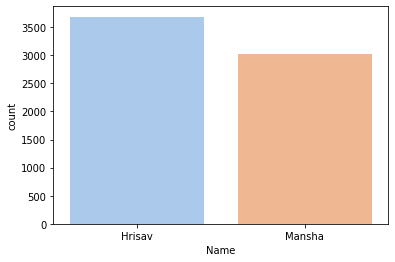

In [96]:
sns.set_palette("pastel")
sns.countplot(df_clean['Name'])

I am slightly ahead as of now :)

### How many times we talked about Corona?

In [118]:
search_words = ['corona', 'Corona']
df_clean[df_clean['Message'].str.contains('|'.join(search_words))]

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek
2639,Mansha,Hahaha is bc corona ne Jina Muskil or liya,15/03/2021,23:52,23,Evening,15,3,2021,Monday
2658,Mansha,Corona yar pura watt laga dala,15/03/2021,23:56,23,Evening,15,3,2021,Monday
4392,Mansha,Isbar solo jaungi if this corona thik ho gya na,08/04/2021,01:52,1,Night,8,4,2021,Thursday
5636,Hrisav,Wish corona wsnt there,12/04/2021,12:39,12,Morning,12,4,2021,Monday
6220,Mansha,Fir corona ka scene nhi hua toh den done aur b...,14/04/2021,16:50,16,Afternoon,14,4,2021,Wednesday
6221,Hrisav,Corona toh brte jaenge,14/04/2021,16:50,16,Afternoon,14,4,2021,Wednesday
6308,Mansha,Pray karo na corona chala jye,14/04/2021,20:47,20,Evening,14,4,2021,Wednesday


### Day of Week message summary

In [126]:
df_clean.groupby(['DayofWeek']).size()

DayofWeek
Friday       1041
Monday        853
Saturday      640
Sunday        619
Thursday     1285
Tuesday      1031
Wednesday    1237
dtype: int64

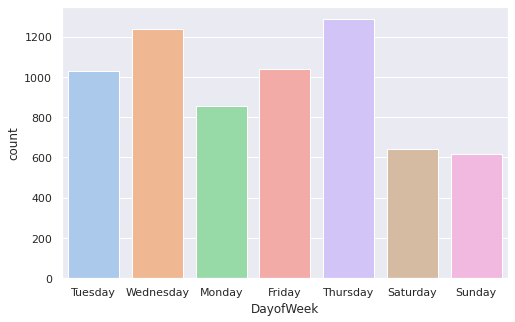

In [133]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_palette("pastel")
sns.countplot(df_clean['DayofWeek'])

We don't talk much on weekends, and it's evident too from the graph. Well, Wednesday and Thursday seems to be our talkative day! Mid week lethargy from studies could be a reason.

### Which hour we text the most?

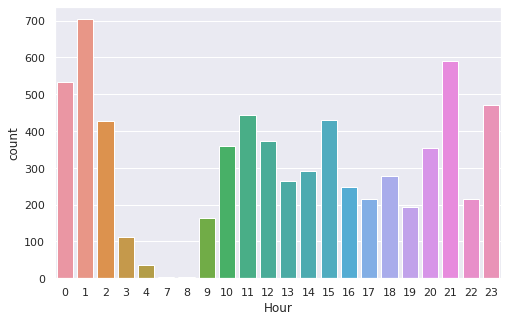

In [272]:
sns.set_palette("pastel")
sns.countplot(df_clean['Hour'])

Seems like we converse most post 1 AM!

### Month wise message summary

In [130]:
df_clean.groupby(['Year','Month']).size()

Year  Month
2020  10         23
      11         45
      12        228
2021  1         588
      2        1134
      3         786
      4        3902
dtype: int64

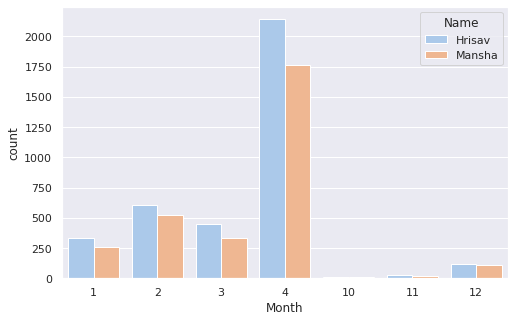

In [132]:
sns.set_palette("pastel")
sns.countplot(x ='Month', hue = 'Name', data = df_clean)

### Which period of day we text most?

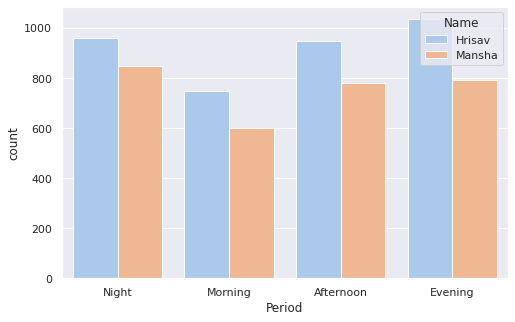

In [134]:
sns.set_palette("pastel")
sns.countplot(x ='Period', hue = 'Name', data = df_clean)

### What does Mansha talk about most?

In [265]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['han','na','mai','mein',\
 '.','ni','nahi','nhi','toh','to','hi','he','so','Arey','Haa','hu','hum','gye','gya',\
 'kar','Ye','ye','se','kuch', 'ki','are','aur','Ya','ek','is','hun','kr','Acha',\
 ',', '?', 'ko',  'h', 'hai', 'ho', '’','hn','bt','No','and','bhai','not','do','ke',\
 'ka', 'k', 'ab', 'kya', 'tha', 'm', 'bhi', 'rhi','thi','rha','me','but','sry','r']
stopwords.extend(newStopWords)
stopwords = set(stopwords)

In [254]:
mansha = df_clean[(df_clean['Name'] == 'Mansha')][['Message']]['Message'].to_string()

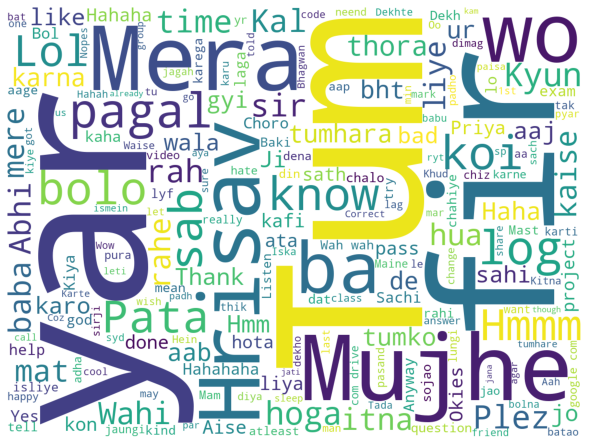

In [266]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(mansha)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What do I talk about?

In [256]:
hrisav = df_clean[(df_clean['Name'] == 'Hrisav')][['Message']]['Message'].to_string()

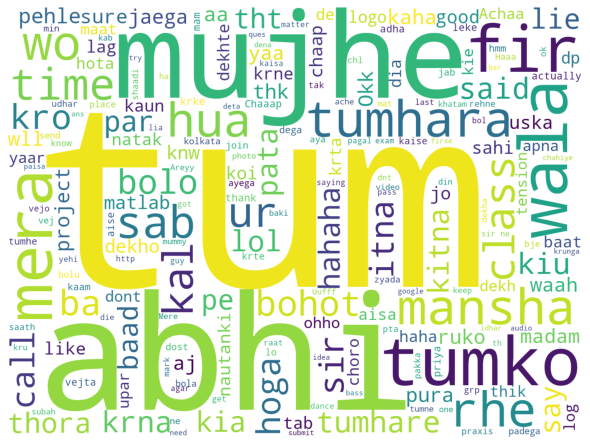

In [267]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(hrisav)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What do we both talk about?

In [258]:
text = df_clean['Message'].to_string()

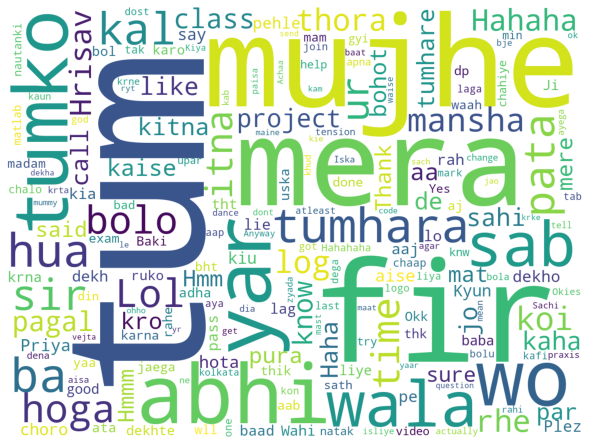

In [268]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(text)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Bigrams

In [269]:
raw = []
for word in df_clean['Message']:
    token = nltk.word_tokenize(str(word).lower())
    raw.extend(token)

In [270]:
l1 = [w for w in raw if w not in stopwords and w not in string.punctuation]

In [271]:
from collections import Counter

bigrams = zip(l1, l1[1:])
counts = Counter(bigrams)
print(counts.most_common(5))

[(('wah', 'wah'), 15), (('u', 'said'), 12), (('sir', 'ne'), 11), (('u', 'know'), 11), (('dont', 'worry'), 10)]
